# **practical no.6**

Aim: Regression and Its Types
*   Implement simple linear regression using a dataset.
*   Explore and interpret the regression model coefficients and goodness-of-fit
measures.
*   Extend the analysis to multiple linear regression and assess the impact of
additional predictors.







**1. Simple Linear Regression**

--- Data Description ---
        World Rank        Score
count  2000.000000  2000.000000
mean   1000.500000    71.586450
std     577.494589     5.079795
min       1.000000    65.700000
25%     500.750000    67.700000
50%    1000.500000    70.200000
75%    1500.250000    74.100000
max    2000.000000   100.000000


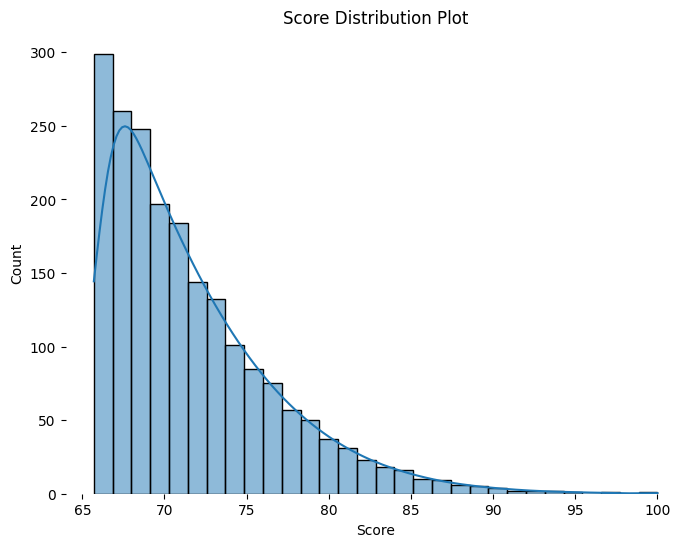

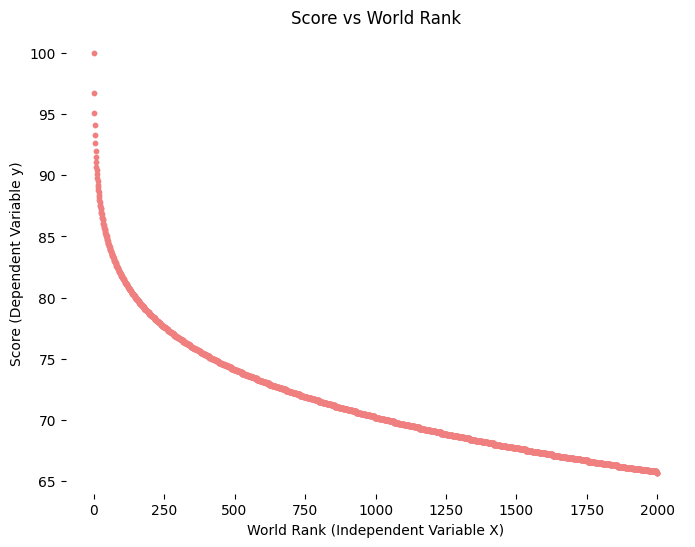

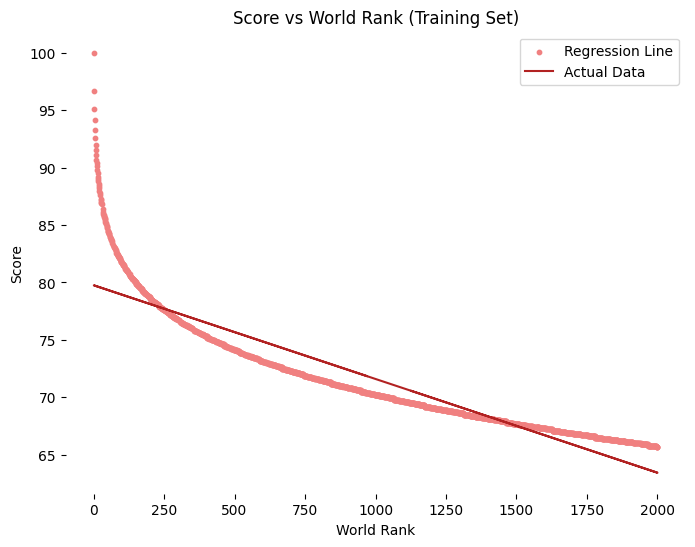

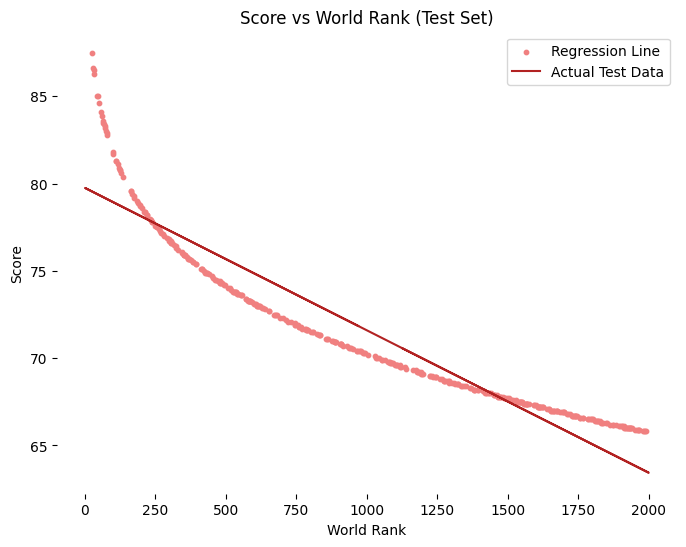


--- Model Coefficients ---
Coefficient (Slope m): -0.0082
Intercept (c): 79.7600


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('WORLD UNIVERSITY RANKINGS.csv')

# --- Data analysis ---
print("--- Data Description ---")
print(df[['World Rank', 'Score']].describe())

# Data Distribution Plot (for the dependent variable 'Score')
plt.figure(figsize=(8, 6))
sns.histplot(df['Score'], kde=True, bins=30)
plt.title('Score Distribution Plot')
plt.xlabel('Score')
plt.box(False)
plt.show()

# check the relationship between Score and World Rank
plt.figure(figsize=(8, 6))
plt.scatter(df['World Rank'], df['Score'], color='lightcoral', s=10)
plt.title('Score vs World Rank')
plt.xlabel('World Rank (Independent Variable X)')
plt.ylabel('Score (Dependent Variable y)')
plt.box(False)
plt.show()

# Split the dataset into dependent/independent variables
X = df[['World Rank']]
y = df[['Score']]

# Split data into Train/Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predict the result
y_pred_test = regressor.predict(X_test)
y_pred_train = regressor.predict(X_train)

# Plot training set data vs predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_train, y_train, color='lightcoral', s=10)
plt.plot(X_train, y_pred_train, color='firebrick')
plt.title('Score vs World Rank (Training Set)')
plt.xlabel('World Rank')
plt.ylabel('Score')
plt.legend(['Regression Line', 'Actual Data'], loc='upper right', facecolor='white')
plt.box(False)
plt.show()

# Plot test set data vs predictions
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='lightcoral', s=10)
# Plot the regression line based on the training data fit
plt.plot(X_train, y_pred_train, color='firebrick')
plt.title('Score vs World Rank (Test Set)')
plt.xlabel('World Rank')
plt.ylabel('Score')
plt.legend(['Regression Line', 'Actual Test Data'], loc='upper right', facecolor='white')
plt.box(False)
plt.show()

# Regressor coefficients and intercept
print("\n--- Model Coefficients ---")
print(f'Coefficient (Slope m): {regressor.coef_[0][0]:.4f}')
print(f'Intercept (c): {regressor.intercept_[0]:.4f}')

**2. Multiple Linear Regression**

Plots have been generated: Score distribution, Score vs Research Rank, Score vs Faculty Rank, and Actual vs Predicted Scores.


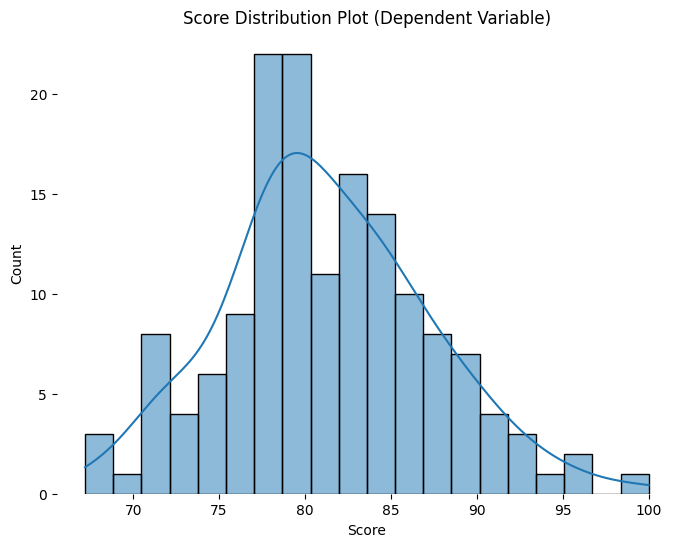

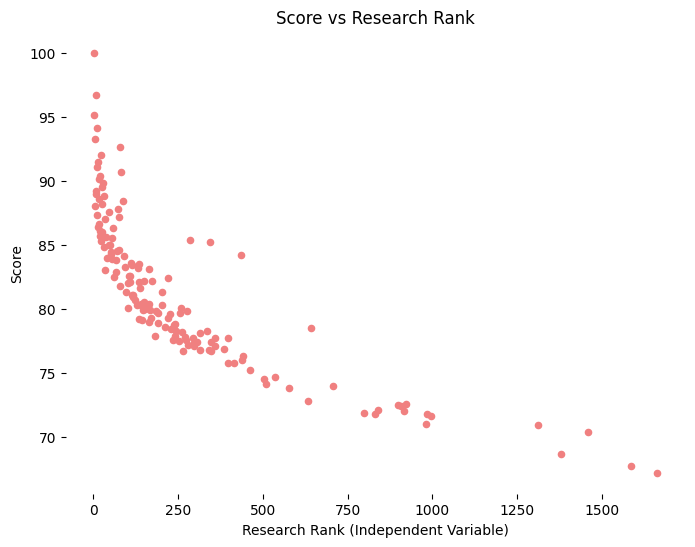

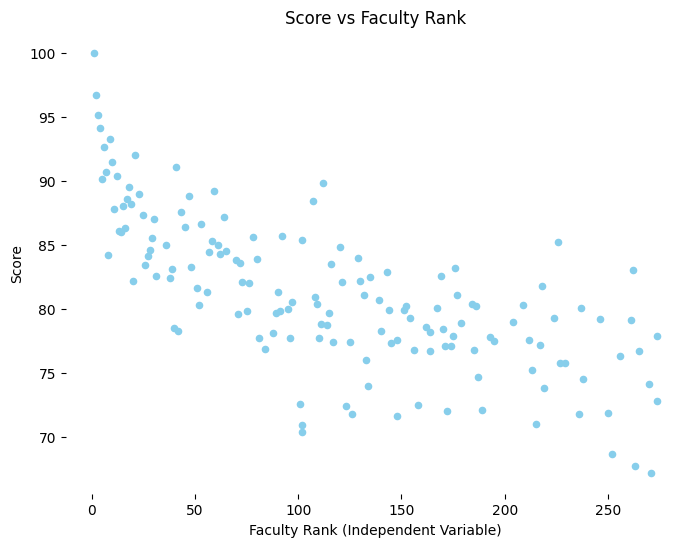

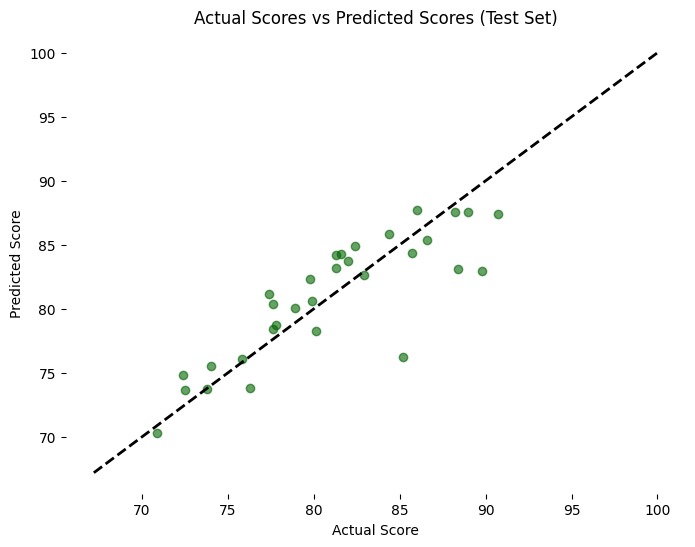

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

# Get dataset
df = pd.read_csv('WORLD UNIVERSITY RANKINGS.csv')

# --- Data Cleaning and Filtering ---
df['Research Rank'] = pd.to_numeric(df['Research Rank'].replace('-', np.nan), errors='coerce')
df['Faculty Rank'] = pd.to_numeric(df['Faculty Rank'].replace('-', np.nan), errors='coerce')
top_5_locations = df['Location'].value_counts().head(5).index.tolist()
df_filtered = df[df['Location'].isin(top_5_locations)].copy()
df_model = df_filtered.dropna(subset=['Research Rank', 'Faculty Rank', 'Score'])

# --- Split into Independent/Dependent variables ---
X_df = df_model[['Location', 'Research Rank', 'Faculty Rank']]
y = df_model['Score'].values
X = X_df.values

# --- One-hot encoding ---
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# --- Split into Train/Test sets ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train model ---
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# --- Predict results ---
y_pred_test = regressor.predict(X_test)


# 1. Score Distribution Plot (Equivalent to 'Profit Distribution Plot' in template)
plt.figure(figsize=(8, 6))
sns.histplot(df_model['Score'], kde=True, bins=20)
plt.title('Score Distribution Plot (Dependent Variable)')
plt.xlabel('Score')
plt.box(False)
plt.show()

# 2. Relationship between Score and Research Rank
plt.figure(figsize=(8, 6))
plt.scatter(df_model['Research Rank'], df_model['Score'], color='lightcoral', s=20)
plt.title('Score vs Research Rank')
plt.xlabel('Research Rank (Independent Variable)')
plt.ylabel('Score')
plt.box(False)
plt.show()

# 3. Relationship between Score and Faculty Rank
plt.figure(figsize=(8, 6))
plt.scatter(df_model['Faculty Rank'], df_model['Score'], color='skyblue', s=20)
plt.title('Score vs Faculty Rank')
plt.xlabel('Faculty Rank (Independent Variable)')
plt.ylabel('Score')
plt.box(False)
plt.show()

# 4. Actual vs Predicted Scores Plot (Model Evaluation)
# This is the most crucial plot for model evaluation, similar to comparing y_pred vs y_test.
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='darkgreen', alpha=0.6)
# Plot the ideal line (y=x) where prediction equals actual value
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.title('Actual Scores vs Predicted Scores (Test Set)')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.box(False)
plt.show()

print("Plots have been generated: Score distribution, Score vs Research Rank, Score vs Faculty Rank, and Actual vs Predicted Scores.")